In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Laden der Daten 

In [3]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

### Unterteilen in des DataFrames in Integer und Object 

In [4]:
data_obj = data.select_dtypes("object").set_index(data.EmployeeNumber)
data_int = data.select_dtypes("int64").set_index(data.EmployeeNumber)

In [5]:
# Betrachten der numerischen Variablen 
data_int.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
# in diesen Spalten steht immer das selbe
data_int = data_int.drop(columns=["EmployeeCount", "StandardHours"])

### Encoding der Objects in 
- binär 1/0
- Kategoriale Daten werden One Hot Encoded

In [7]:
# Untersucher der Object Variablen 
data_obj.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
# Attrition als Target Variable 
Attrition = pd.DataFrame(data_obj.Attrition.replace({
    "Yes": 1, 
    "No": 0,
})).set_index(data.EmployeeNumber)

In [9]:
# Welche Werte sind in Business Travel ?
data_obj.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [10]:
travel_enc = pd.DataFrame(data.BusinessTravel.replace({
    "Non-Travel": 0,
    "Travel_Rarely": 1,
    "Travel_Frequently": 5,
})).set_index(data.EmployeeNumber)

In [11]:
# Welche Departments gibt es ?
header = data_obj.JobRole.unique()
header

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [12]:
# Encoden der Departments
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
role_enc = pd.DataFrame(ohe.fit_transform(data_obj[["JobRole"]]).toarray(), columns=header).set_index(data.EmployeeNumber)


In [13]:
# Ich weis zwar nicht was genau das ist, aber wird mal mitgenommen

data_obj["OverTime"] = data_obj.OverTime.replace({
    "Yes": 1,
    "No": 0,
})

In [14]:
# data_new = data_int.join(role_enc, how="right", rsuffix="EmployeeNumber")

# Habe die Featueres später getestet und hatten einen schlechten chi Wert, habe sie nicht mehr mit rein genommen 

In [14]:
data_new = data_int.join(travel_enc, how="right", rsuffix="EmployeeNumber")

In [15]:
data_new = data_new.join(Attrition, how="right", rsuffix="EmployeeNumber")

In [17]:
data_new.to_csv("HR_semi_raw_model_data")

In [18]:
y = data_new.Attrition
x = data_new.drop(["Attrition","MonthlyIncome", "EmployeeNumber", "HourlyRate", "MonthlyRate", "DailyRate"], axis=1)

In [19]:
x


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel
EmployeeNumber,,,,,,,,,,,,,,,,,,,,
1,41,1,2,2,3,2,4,8,11,3,1,0,8,0,1,6,4,0,5,1
2,49,8,1,3,2,2,2,1,23,4,4,1,10,3,3,10,7,1,7,5
4,37,2,2,4,2,1,3,6,15,3,2,0,7,3,3,0,0,0,0,1
5,33,3,4,4,3,1,3,1,11,3,3,0,8,3,3,8,7,3,0,5
7,27,2,1,1,3,1,2,9,12,3,4,1,6,3,3,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,23,2,3,4,2,4,4,17,3,3,1,17,3,3,5,2,0,3,5
2062,39,6,1,4,2,3,1,4,15,3,1,1,9,5,3,7,7,1,7,1
2064,27,4,3,2,4,2,2,1,20,4,2,1,6,0,3,6,2,0,3,1


In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score, precision_score
from sklearn.metrics import plot_roc_curve, RocCurveDisplay

In [150]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4 ,random_state=42, stratify=y)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=x.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=x.columns, index=X_test.index)

Rohtest

In [31]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

Balanced Accuracy:  0.8724489795918368


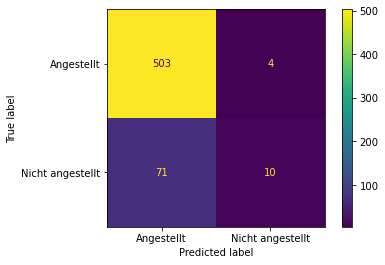

In [32]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format="d", 
                      display_labels=["Angestellt", "Nicht angestellt"])

y_svm = clf_svm.predict(X_test_scaled)
print("Balanced Accuracy: ", accuracy_score(y_test, y_svm))

Gridsearch 

In [24]:
param_grid = [
    {
        "C": [0.5, 1, 10, 100],
        "gamma": ["scale", 1, .1, .01, .001, .0001],
        "kernel": ["rbf"]
    }
]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv =5,
        #scoring ="accuracy",
        scoring = "balanced_accuracy",
        #scoring = "f1_score"
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [212]:
clf_svm = SVC(C=100, gamma='scale', random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.1, random_state=42)

Accuracy:  0.8622448979591837


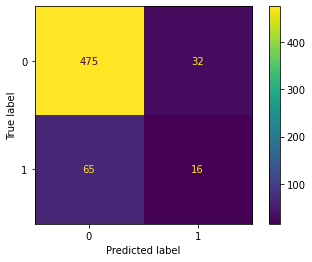

In [213]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format="d",
                      
                      )

y_svm = clf_svm.predict(X_test)
print("Accuracy: ", accuracy_score(y_svm, y_test))

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=X_train_scaled.shape[1])
pca.fit(X_train)

PCA(n_components=20)

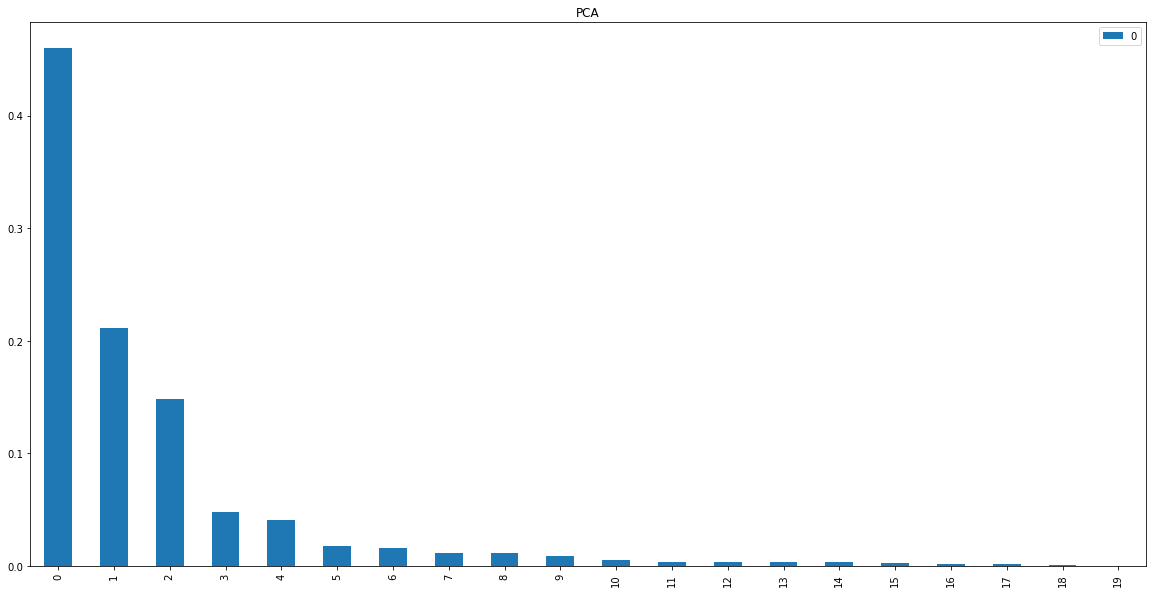

In [35]:
ax = pd.DataFrame(pca.explained_variance_ratio_).plot(kind = "bar", 
                                                 figsize=[20,10])

ax.set_title("PCA")

a = zip(np.arange(1, X_train.shape[1] + 1), pca.explained_variance_ratio_.cumsum())
a = pd.DataFrame(a, columns=["Principal Components", "Accumulated Variance"])

In [36]:
a

,Principal Components,Accumulated Variance
0,1,0.459848
1,2,0.670899
2,3,0.819306
3,4,0.867189
4,5,0.908415
5,6,0.925826
6,7,0.942024
7,8,0.954031
8,9,0.965377
9,10,0.973863


In [37]:
pca = PCA(n_components=5).fit(x)

X_pca_train = pd.DataFrame(pca.transform(X_train), index=X_train.index)

In [38]:
param_grid = [
    {
        "C": [0.5, 1, 10, 100],
        "gamma": ["scale", 1, .1, .01, .001, .0001],
        "kernel": ["rbf"]
    }
]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv = 5,
        #scoring ="accuracy",
        scoring = "balanced_accuracy",
        #scoring = "f1_macro"
)

optimal_params.fit(X_pca_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [39]:
clf_svm = SVC(C=100, gamma = 0.01, random_state=42, probability=True)
clf_svm.fit(X_pca_train, y_train)

SVC(C=100, gamma=0.01, probability=True, random_state=42)

In [40]:
X_pca_test = pd.DataFrame(pca.transform(X_test), index=X_test.index)

Accuracy:  0.7295918367346939
Accuracy:  0.47333190989644497


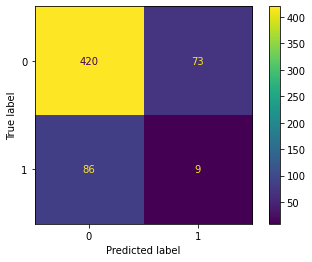

In [225]:
plot_confusion_matrix(clf_svm, 
                      X_pca_test, 
                      y_test, 
                      values_format="d",
                      )

y_svm = pd.DataFrame(clf_svm.predict(X_pca_test), index=X_pca_test.index)

y_prob = pd.DataFrame(clf_svm.predict_proba(X_pca_test),index=X_pca_test.index)
y_prob.index = X_pca_test.index

print("Accuracy: ", accuracy_score(y_test, y_svm))
print("Accuracy: ", balanced_accuracy_score(y_test, y_svm))

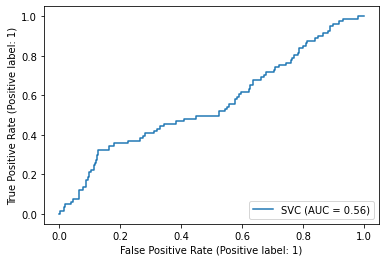

In [42]:
ax = plot_roc_curve(clf_svm, 
                      X_pca_test, 
                      y_test,
                      )

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(learning_rate=0.1)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy:  0.8469387755102041
Balanced Accuracy:  0.6197928899327426
F1 Score:  0.375


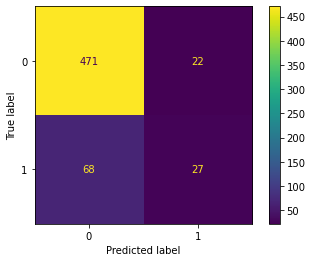

In [157]:
plot_confusion_matrix(clf_gb, 
                      X_test, 
                      y_test, 
                      values_format="d",
                      )

y_gb = pd.DataFrame(clf_gb.predict(X_test), index=X_pca_test.index)

y_prob = pd.DataFrame(clf_gb.predict_proba(X_test),index=X_test.index)
y_prob.index = X_test.index

print("Accuracy: ", accuracy_score(y_test, y_gb))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_gb))
print("F1 Score: ", f1_score(y_test, y_gb))

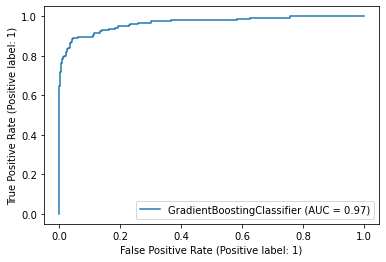

In [51]:
plot_roc_curve(clf_gb,
              X_train,
              y_train)

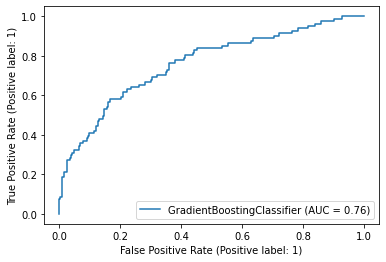

In [379]:
plot_roc_curve(clf_gb,
              X_test,
              y_test)

# Extreme Gradient Boosting Optimization

In [227]:
# Erste Runde Extreme Gradient Boosting Optimierung 
param_grid = param_grid = [
    {
        "max_depth": [3, 4, 5, 10],
        "learning_rate": [0.1, 0.01, 0.05],
        "gamma": [0, 0.25, 1],
        "reg_lambda": [0, 1, 10, 20],
        "scale_pos_weight": [1,5,10,20,100]
    }
]

optimal_params = GridSearchCV(
    estimator=XGBClassifier(objective="binary:logistic",
                           seed=42,
                           use_label_encoder=False,
                           subsample=0.9,
                           colsample_bytree=0.5
                           ),
    param_grid=param_grid,
    scoring="roc_auc",
    verbose=2,
    n_jobs=10,
    cv=5
    )

optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric="aucpr",
                  eval_set=[(X_test, y_test)]
                  )

print(optimal_params.best_params_, optimal_params.best_score_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[0]	validation_0-aucpr:0.27784
[1]	validation_0-aucpr:0.28411
[2]	validation_0-aucpr:0.29217
[3]	validation_0-aucpr:0.29950
[4]	validation_0-aucpr:0.31224
[5]	validation_0-aucpr:0.31231
[6]	validation_0-aucpr:0.32117
[7]	validation_0-aucpr:0.34400
[8]	validation_0-aucpr:0.35110
[9]	validation_0-aucpr:0.35143
[10]	validation_0-aucpr:0.36096
[11]	validation_0-aucpr:0.35781
[12]	validation_0-aucpr:0.37265
[13]	validation_0-aucpr:0.37454
[14]	validation_0-aucpr:0.37566
[15]	validation_0-aucpr:0.38244
[16]	validation_0-aucpr:0.38480
[17]	validation_0-aucpr:0.38746
[18]	validation_0-aucpr:0.39727
[19]	validation_0-aucpr:0.40008
[20]	validation_0-aucpr:0.40143
[21]	validation_0-aucpr:0.40864
[22]	validation_0-aucpr:0.41288
[23]	validation_0-aucpr:0.41873
[24]	validation_0-aucpr:0.41794
[25]	validation_0-aucpr:0.41840
[26]	validation_0-aucpr:0.41637
[27]	validation_0-aucpr:0.40993
[28]	validation_0-aucpr:0.41163
[29]	validation_0-

## XG Boost mit getunten Parametern -> scale_pos_weight = 2

In [1]:
clf_xgb = XGBClassifier(objective="binary:logistic",
                           seed=42,
                           gamma=1,
                           use_label_encoder=False,
                           subsample=0.9,
                           colsample_bytree=0.5,
                           max_depth=5,
                           reg_lambda=10,
                           scale_pos_weight = 1,
                           learning_rate=0.1
                       )

clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric="auc", eval_set=[(X_test, y_test)])

NameError: name 'XGBClassifier' is not defined

Accuracy:  0.8435374149659864
Balanced Accuracy:  0.6347603288139212
F1 Score:  0.4025974025974026


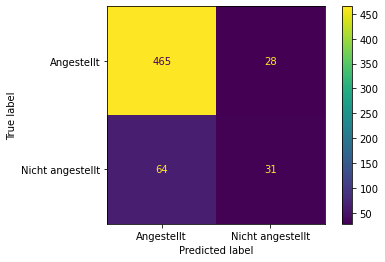

In [226]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test, 
                      values_format="d",
                      display_labels=["Angestellt", "Nicht angestellt"]
                      )

y_xgb = pd.DataFrame(clf_xgb.predict(X_test), index=X_pca_test.index)

y_prob = pd.DataFrame(clf_xgb.predict_proba(X_test),index=X_test.index)
y_prob.index = X_test.index

print("Accuracy: ", accuracy_score(y_test, y_xgb))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_xgb))
print("F1 Score: ", f1_score(y_test, y_xgb))

In [ ]:
clf_xgb = XGBClassifier(objective="binary:logistic",
                           seed=42,
                           gamma=1,
                           use_label_encoder=False,
                           subsample=0.9,
                           colsample_bytree=0.5,
                           max_depth=5,
                           reg_lambda=10,
                           scale_pos_weight = 2,
                           learning_rate=0.1
                       )

clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric="auc", eval_set=[(X_test, y_test)])

plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test, 
                      values_format="d",
                      display_labels=["Angestellt", "Nicht angestellt"]
                      )

y_xgb = pd.DataFrame(clf_xgb.predict(X_test), index=X_pca_test.index)

y_prob = pd.DataFrame(clf_xgb.predict_proba(X_test),index=X_test.index)
y_prob.index = X_test.index

print("Accuracy: ", accuracy_score(y_test, y_xgb))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_xgb))
print("F1 Score: ", f1_score(y_test, y_xgb))

In [72]:
def plot_histogram(x):
    plt.hist(x, color="grey", alpha=.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [95]:
def plot_histogram_dv(x, y):
    plt.hist(list(x[y==0]), alpha=0.5, label="Angestellt")
    plt.hist(list(x[y==1]), alpha=0.5, label="N.angestellt")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

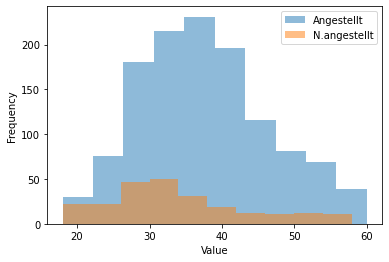

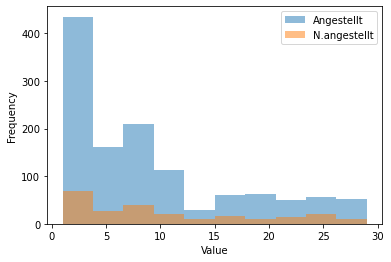

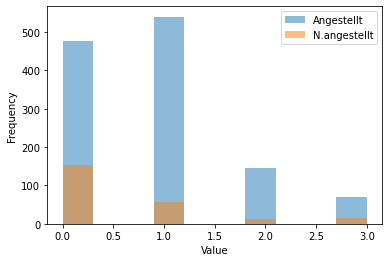

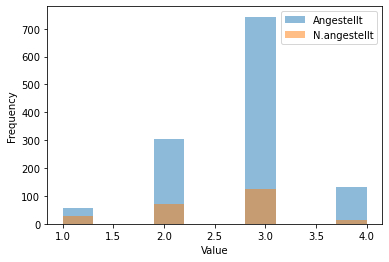

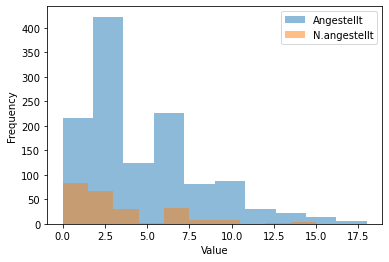

In [104]:
plot_histogram_dv(x["Age"], y)
plot_histogram_dv(x["DistanceFromHome"], y)
plot_histogram_dv(x["StockOptionLevel"], y)
plot_histogram_dv(x["JobInvolvement"], y)
plot_histogram_dv(x["YearsInCurrentRole"], y)

In [108]:
import plotly.express as px

In [124]:
fig = px.scatter(y,x["YearsInCurrentRole"], color=y)

fig.show()
## Wie lange eine Person in einer Rolle ist, muss mit der Dauer in dem Unternehmen verrechnet werden 

## Kann man vllt die intrinsische Motivation eines Mitarbeiters messen, also ob er karriere machen möchte oder nicht 

In [135]:
fig = px.scatter(x = x["BusinessTravel"], y = x["Age"], color=y, )
fig.show()

[0]	validation_0-aucpr:0.27750
[1]	validation_0-aucpr:0.28863
[2]	validation_0-aucpr:0.32457
[3]	validation_0-aucpr:0.34969
[4]	validation_0-aucpr:0.35031
[5]	validation_0-aucpr:0.37582
[6]	validation_0-aucpr:0.38111
[7]	validation_0-aucpr:0.38560
[8]	validation_0-aucpr:0.39026
[9]	validation_0-aucpr:0.39665
[10]	validation_0-aucpr:0.40489
[11]	validation_0-aucpr:0.41580
[12]	validation_0-aucpr:0.42342
[13]	validation_0-aucpr:0.42513
[14]	validation_0-aucpr:0.42591
[15]	validation_0-aucpr:0.42570
[16]	validation_0-aucpr:0.42135
[17]	validation_0-aucpr:0.41176
[18]	validation_0-aucpr:0.41905
[19]	validation_0-aucpr:0.41924
[20]	validation_0-aucpr:0.42067
[21]	validation_0-aucpr:0.41795
[22]	validation_0-aucpr:0.42932
[23]	validation_0-aucpr:0.42953
[24]	validation_0-aucpr:0.43591
[25]	validation_0-aucpr:0.43705
[26]	validation_0-aucpr:0.43579
[27]	validation_0-aucpr:0.43952
[28]	validation_0-aucpr:0.43873
[29]	validation_0-aucpr:0.44058
[30]	validation_0-aucpr:0.44312
[31]	validation_0-

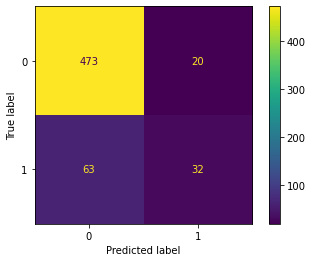

In [172]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective="binary:logistic", seed=42, use_label_encoder=False)
clf_xgb.fit(
    X_train,
    y_train,
    verbose=True,
    early_stopping_rounds=10,
    eval_metric="aucpr",
    eval_set=[(X_test, y_test)])

y_xgb = pd.DataFrame(clf_xgb.predict(X_test), index=X_pca_test.index)

plot_confusion_matrix(clf_xgb, X_test, y_test)

print("Accuracy: ", accuracy_score(y_test, y_xgb))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_xgb))
print("F1 Score: ", f1_score(y_test, y_xgb))

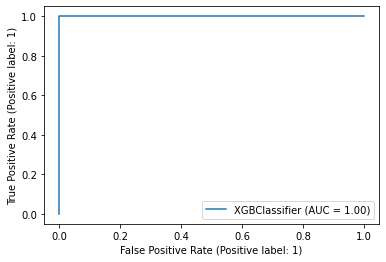

In [178]:
plot_roc_curve(clf_xgb,
              X_train,
              y_train)

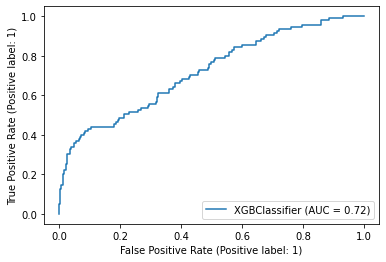

In [180]:
plot_roc_curve(clf_xgb,
              X_test,
              y_test)